# Clustering

So far in the semester, we had **input variables, attributes**, and an **output variable, target attribute (label)**. Our goal was to **predict this output variable** by the means of a mapping function such that $Y \, = \, f(X)$ where $Y$ is the output variable and $X$ is input variables. The algorithms we utilized helped us model this mapping function with the help of the output variable during the training process. However, that's not always the case. We may encounter with datasets in which **no label exists**.

### Supervised vs Unsupervised Learning

![](https://static.packt-cdn.com/products/9781788393485/graphics/c3d6f251-434b-4c23-99bb-50c272c71027.png)

**Supervised Learning:** For supervised learning, a ground truth is required. We have prior knowledge of what the output values for our samples should be during the training process. Therefore, the goal of supervised learning is to learn the function mentioned above that.

**Unsupervised Learning:** As mentioned above, we do not always have labels for the data points we have. The goal of unsupervised learning is to structure those data points so that we can infer valuable insights. 

Clustering, one of the unsupervised learning techniques, is the task of dividing the data points into a number of groups, clusters, such that data points in the same groups are more similar to other data points in the same group than those in other groups. In other words, the goal is to come up with clusters with similar characteristics and merge them into clusters.

![](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/GUID-A06A412D-2F4F-4D35-8FFF-1F4B3B3A8F16-web.png)

Today, we'll talk about a clustering algorithm named **K-Means** and some of the clustering evaluations methods.

### K-Means

An iterative clustering algorithm in which clusters are defined by the cluster centroids. 

The number of clusters required at the end have to be provided beforehand, which makes it important to have prior knowledge of the dataset.

![](http://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

**Steps**

a. Set **k** as the number of clusters

b. Create k **random** centroids

c. For each data point, compute the **distance** to centroid and assign it to the nearest one.

d. For each cluster, compute the centroids again by taking the **mean** of assigned data points.

e. Repeat c and d till centroids do not change or for a threshold value.

With K-Means

- we will always have _k_ clusters.
- clusters are spherical.
- Clusters of a similar size assumed.

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

path_prefix = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import random
from copy import deepcopy
import matplotlib.lines as mlines

# interactivity
from ipywidgets import interact

sns.set_style("darkgrid")

%matplotlib inline

In [0]:
# importing Kmeans
from sklearn.cluster import KMeans
# finding the distances between centroid and data points
from scipy.spatial import distance

Let's visualize the steps in K-Means with random data.

In [0]:
# set seed for reproduction
np.random.seed(0)

# samples from two different normal distributions
s1 = np.random.normal(loc=5, scale=2, size=[30, 2])
s2 = np.random.normal(loc=15, scale=2, size=[30, 2])

# merge two samples
data = np.vstack([s1, s2])

In [0]:
def clustering(num_iterations=0):

    # x coordinates of centroids
    cx = [11,3]
    # y coordinates of centroids
    cy = [1,11]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    # let's plot data points
    axs[0].scatter(s1[:,0], s1[:, 1], label="cluster1")
    axs[0].scatter(s2[:,0], s2[:, 1], label="cluster2")

    # and initial centroids
    axs[0].scatter(cx[0], cx[1], marker="x", s=150, c="r")
    axs[0].scatter(cy[0], cy[1], marker="x", s=150, c="b")
    
    axs[0].legend()
    axs[0].set_title("Original Clusters and Centroids")
    
    # merge centroid coordinates
    centroids = np.vstack([cx, cy])
    # store previous centroids
    old_centroids = centroids.copy()
    
    # cluster labels
    labels = np.zeros(data.shape[0])
    
    # iterations come from the slider
    for _ in range(num_iterations):

        # iterate over the data with indices
        for i, d in enumerate(data):

            # store distances to each centroid
            distances = np.zeros(len(centroids))

            # compute the distance for each centroid
            for c, _ in enumerate(centroids):
                # euclidean distance between data point and centroid
                distances[c] = distance.euclidean(data[i], centroids[c])

            labels[i] = distances.argmin()
        
        # store previous centroids
        old_centroids = deepcopy(centroids)

        # update centroids by taking the mean of each cluster
        for c in range(len(centroids)):
            centroids[c] = data[labels == c].mean(axis=0)
            
    # plot data points
    axs[1].scatter(data[:,0], data[:, 1], c=np.where(labels == 0, "c", "m"))

    # and centroids
    axs[1].scatter(centroids[0][0], centroids[0][1], 
                   marker="x", s=150, c="c")
    axs[1].scatter(centroids[1][0], centroids[1][1], 
                   marker="x", s=150, c="m")
    
    # previous one as well
    axs[1].scatter(old_centroids[0][0], old_centroids[0][1], 
                   marker="x", s=150, c="c", alpha=0.3)
    axs[1].scatter(old_centroids[1][0], old_centroids[1][1], 
                   marker="x", s=150, c="m", alpha=0.3)    
    
    curr_cent = mlines.Line2D([], [], color='b', marker='x', c="black",
                          markersize=15, label='Shifted Location', linestyle='None')
    prev_cent = mlines.Line2D([], [], color='b', marker='x', c="black",
                          markersize=15, label='Previous Location', linestyle='None', alpha=0.3)
    
    axs[1].legend(handles=[curr_cent, prev_cent])
    axs[1].set_title("Number of Iterations: {}".format(num_iterations))
    
    plt.show()
    
interact(clustering, num_iterations=(0,10))

interactive(children=(IntSlider(value=0, description='num_iterations', max=10), Output()), _dom_classes=('widg…

<function __main__.clustering>

Let's increase the number of clusters.

In [0]:
filename = "clusters.csv"

data15 = pd.read_csv(join(path_prefix, filename)).values

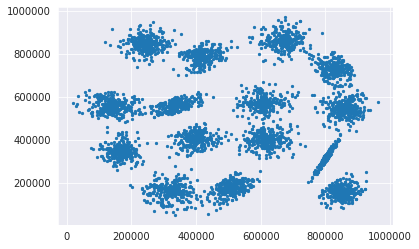

In [0]:
plt.scatter(data15[:, 0], data15[:, 1], s=5)
plt.show()

14 spherical clusters and 1 non-sperical one. But, let's assume that we do not know the number of clusters.

In [0]:
# create kmeans model and set k as 5
model = KMeans(n_clusters=5)
model.fit(data15)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

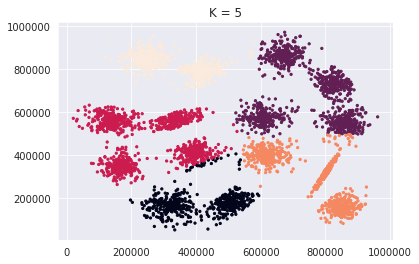

In [0]:
# get the resulting the cluster labels
labels = model.labels_

plt.scatter(data15[:, 0], data15[:, 1], c=labels, s=5)
plt.title("K = 5")
plt.show()

Since we set _k_ as 5, we obtained 5 clusters as expected. However, that is not the case. We need some sort of mechanism to determine the number of clusters within the data.

Elbow method help us to heuristically determine the number of clusters. In K-Means clustering, our goal is to to define clusters such that the total intra-cluster variation, total within-cluster sum of square, is minimized. Basically, we'll define a range of values for _k_ and then choose the one that is located at the `"elbow"`, i.e. the point after which the inertia start decreasing.

**Inertia:** Sum of squared distances of samples to their closest cluster center.

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/08/Screenshot-from-2019-08-08-15-37-02.png)

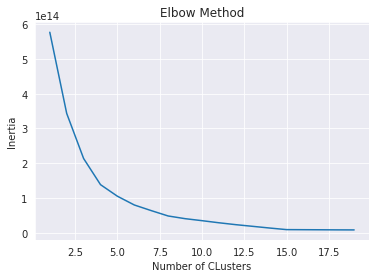

In [0]:
# define number of cluster range
n_clusters_range = np.arange(1, 20)
# store intra cluster variation value
intra_cluster_var = []

for k in n_clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(data15)
    
    # append intra cluster variation, i.e. inertia attribute in the model
    intra_cluster_var.append(model.inertia_)
    
plt.plot(n_clusters_range, intra_cluster_var)
plt.xlabel("Number of CLusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

From the figure, we can observe that the line goes flat after _k_ equal or greater than 15. Remember, elbow method is one of the simplest methods to determine the number of clusters. You may also use [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) in order to determine the number of clusters.

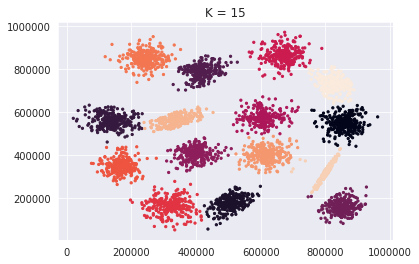

In [0]:
# clustering with k set to 15
model = KMeans(n_clusters=15)
model.fit(data15)

cluster_labels = model.labels_

plt.scatter(data15[:, 0], data15[:, 1], c=cluster_labels, s=5)
plt.title("K = 15")
plt.show()

In the cluster with non-spherical shape, we can see some data points assigned wrongly, because of the fact that K-Means assumes spherical clusters.